# MVC improved and the Observer Design Pattern #

### Richard Mather ###

### October, 2021 ###

## This unit introduces the classification of Design Patterns ##

##  We will improve the <font color="red">'Observer'</font> mechanism in our earlier <font color="red">Model-View-Contoller</font>  ##

##  We will look at <font color="red">Observer</font> which is also present as the <font color="red">View</font> in many MVC implementations ##

## At the end there is <font color="red">a logbook exercise for you to complete</font>  ##


## The Classification of Design Patterns ##

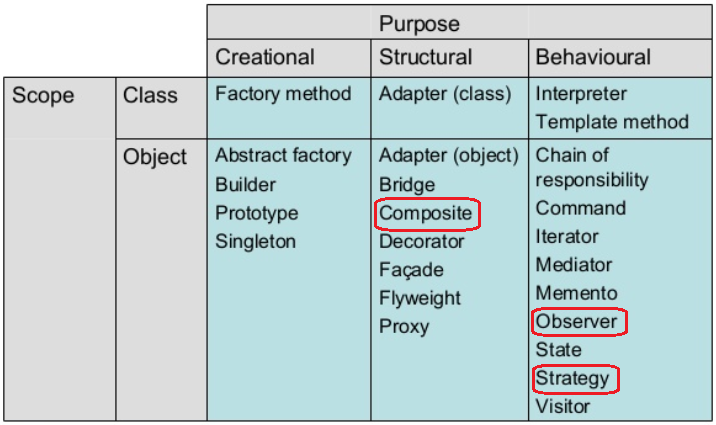

- GoF classified patterns by ***criteria***

1. Purpose ...
 - Creational - concern object creation
 - Structural - concern composition of classes or objects
 - Behavioural - concern the way in which classes interact and distribute responsibility
 
2. Scope ...

 - Class - concern relationships between classes and subclasses - may concern inheritance, are static and fixed at compile time
 - Object - deal with object relationships, are more dynamic and may be changed at run-time
 
- Some patterns are used together e.g. MVC is also represented by Observer, Composite and Strategy 

*Figures from Gamma et al. (1995) and https://www.slideshare.net/himanshuhora/design-pattern-categories

# MVC - Composite and Strategy: 

### Composite: ### 
"Compose objects into tree structures to represent part-whole hierachies. Composite lets clients treat individual objects and compositions of objects uniformly" (Gamma et al., 1995) 
- The GoF explain the ***motivation*** behind Composite using the following example ... "*Graphics applications like drawing editors and schematic capture systems let users build complex diagrams out of simple components, which in turn can be grouped to form still larger components. A simple implementation could define classes for graphical primitives such as Text and Lines plus other classes that act as containers for these primitives ... The composite pattern describes how to use **recursive** composition so that clients don't have to make this distinction*" [i.e. the distinction between primitive and container objects] 

### Strategy: ### 
"Define a family of algorithms, encapsulate each one, and make them interchangeable. Strategy lets the algorithm vary independently from clients that use it" (Gamma et al., 1995) 

- Use this when classes differ only in their behaviour ... provide a means for configuring a class with one of many behaviours
- Have many uses including line-break strategies across different platforms, the application of different financial forecast instruments, different strategies may be applied to GUI dialog boxes to ensure users enter valid data 


## Describing Design Patterns ##

- The GoF provide a detailed template for DP classification
- An abbreviated form of this with most essential elements might include:
 - Name
 - Intent (mainly the problem being addressed)
 - Structure (usually in UML)
 - Consequences (trade-offs)
 - Sample code
 - Known uses

## The Observer Design Pattern ##
### An object behavioural pattern ###

### Intent: ### 
"Define a one-to-many dependency between objects so that when one object changes state, all its dependents are notified and update automatically."

A spreadsheet or other data object may be represented by several view objects which have no knowledge of each other but behave as if they do ... when one changes it updates the others.

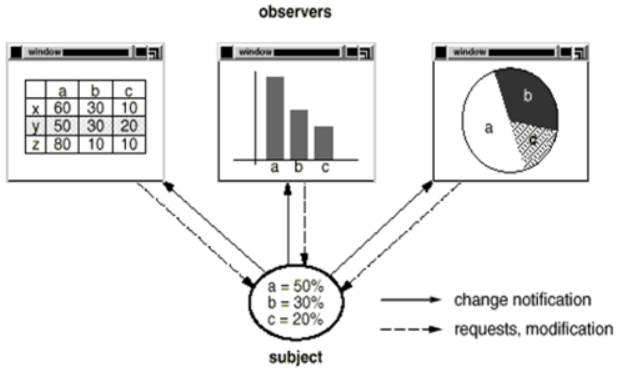

### Structure ###
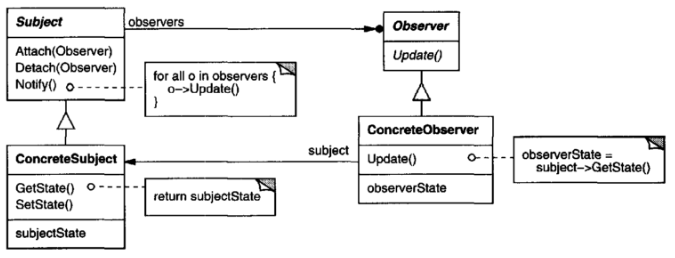

### Consequences ###

- Very low and abstract coupling between *subjects* and *observers* (subjects have no 'knowledge' of their observers which are held in a collection) with potential to add, remove, reuse both without downstream effects
- Makes it easy to achieve *broadcast* communication to multiple observers with polymorphic interpretations of updates
- May be prone to unexpected notifications which will trigger updates in all observers

### Implementation ###
- Concise example from Jungwoo Ryoo's course on Python Design Patterns (https://www.lynda.com/Python-tutorials/Observer-example/369187/419202-4.html) ... see below

- NOTE: Jungwoo Ryoo's example is annotated to map components to the UML above


In [4]:
# THE SUBJECT - AN INTERFACE TO ATTACH, DETACH AND NOTIFY OBSERVER OBJECTS #
class Subject(object): #Represents what is being 'observed'

    def __init__(self):
        self._observers = [] # This where references to all the observers are being kept
                             # Note that this is a one-to-many relationship: there will be one subject to be 
                             # observed by multiple _observers

    def attach(self, observer):
        if observer not in self._observers: #If the observer is not already in the observers list
            self._observers.append(observer) # append the observer to the list

    def detach(self, observer): #Simply remove the observer
        try:
            self._observers.remove(observer)
        except ValueError:
            pass

    def notify(self, modifier=None):
        for observer in self._observers: # For all the observers in the list
            if modifier != observer: # Don't notify the observer who is actually updating the temperature 
                observer.update(self) # Alert the observers!

# A CONCRETE SUBJECT - A 'SETTER' INTERFACE TO NOTIFY OBJECTS (REGISTERED IN THE SUBJECT) OF CHANGES #
class Core(Subject): #Inherits from the Subject class

    def __init__(self, name=""):
        Subject.__init__(self)
        self._name = name #Set the name of the core
        self._temp = 0 #Initialize the temperature of the core

    @property #Getter that gets the core temperature
    def temp(self):
        return self._temp

    @temp.setter #Setter that sets the core temperature
    def temp(self, temp):
        self._temp = temp
        self.notify() #Notify the observers whenever somebody changes the core temperature

# A CONCRETE OBSERVER - HAS AN UPDATE INTERFACE TO MAINTAIN STATE BY LISTENING NOTIFY CHANGES IN THE SUBJECT        
class TempViewer:

    def __init__(self, name=""):
                self._name = name #Set the name of the TempViewer

    def update(self, subject): #Alert method that is invoked when the notify() method in a concrete subject is invoked
        print("Temperature Viewer {} : {} has Temperature {}".format(self._name, subject._name, subject._temp))

#Let's create our subjects
c1 = Core("Core 1")
c2 = Core("Core 2")

#Let's create our observers
v1 = TempViewer("Viewer 1")
v2 = TempViewer("Viewer 2")

#Let's attach our observers to the first core
c1.attach(v1)
c1.attach(v2)

#Let's change the temperature of our first core
c1.temp = 80
c1.temp = 90

Temperature Viewer Viewer 1 : Core 1 has Temperature 80
Temperature Viewer Viewer 2 : Core 1 has Temperature 80
Temperature Viewer Viewer 1 : Core 1 has Temperature 90
Temperature Viewer Viewer 2 : Core 1 has Temperature 90


### Improving our MVC with Observer behaviour ###

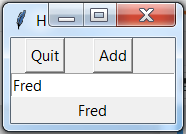

- At present label changes in our MVC GUI are purely driven by setting the label text to be the same as that in the text field

```
self.view.setLabel_text(self.view.entry_text.get())
```

- However, it would be more effective and in keeping with Observer behaviour if ...
 - the Controller messaged the GUI to update the list in the Model 
 ``` self.model.add_to_list(self.view.entry_text.get()) ```
 - then the GUI label was updated by the vc delegate from the Model 
 - thereby confirming change at the Model level by extracting the last item '[-1]' in the list <br>
 ``` self.view.set_label_text(self.model.get_list()[-1]) ```
 
- These changes are highlighted ***### NEW ###***
- ***NOTE:*** this is not a complete implementation of Observer as there are no 'Subject' or 'Observer' interfaces
- It is a more observer-like implementation as it completed the Notify-Update message cycle between View and Model via Control 

- Code is also updated to demonstrate that the three controller and virtual controller (vc) objects are the same object

In [11]:
# MVC_Template_01
# 2014 May 23  by Steven Lipton http://makeAppPie.com
# Controller initializing MVC -- simplest version possible.
# Additional annotations by R Mather - Oct 2018
# Improved use of OBSERVER DP - R Mather - May 2020
# Improved compliance to Python naming conventions - J Cross - January 2024


# Tkinter is a Python binding to the Tk GUI toolkit/library - RM
from tkinter import *
 
# A Model-View-Controller framework for TKinter.
# Model: Data Structure. Controller can send messages to it, and model can respond to message.
# View : User interface elements. Controller can send messages to it. View can call methods from Controller when an event happens.
# Controller: Ties View and Model together. turns UI responses into chages in data.
 

#Controller: Ties View and Model together.
#       --Performs actions based on View events.
#       --Sends messages to Model and View and gets responses
#       --Has Delegates - RM NOTE: essential for communications between view and model via control
 
class MyController():
    def __init__(self,parent):
        self.parent = parent
        # CRITICAL PART OF THE MVC 
        # RM NOTES:
        # MyController passes a reference to itself (self) when it creates MyModel and MyView objects
        # This allows the MyModel and MyView objects to create 'delegates' (see 'vc' = virtual controller?)
        # The vc objects can then call methods on the MyControl object, thereby allowing the View to update the Model via the Controller 
        self.model = MyModel(self)    # initializes the model
        self.view = MyView(self)  #initializes the view
        # Initialize objects in view
        self.view.set_entry_text('Add to Label') # a non cheat way to do MVC with tkinter control variables
        self.view.set_label_text('Ready')
        print("MyModel obj str representation = ", repr(self.model.vc), " & memory address = ", id(self.model.vc))
        print("MyView obj str representation = ", repr(self.view.vc), " & memory address = ", id(self.view.vc))
    
    #event handlers
    def quit_button_pressed(self):
        self.parent.destroy()
    def add_button_pressed(self):
        ### NEW ### OBSERVER DP isn't properly used here (now commented out) as setLabel_text isn't informed by the MODEL - now properly implemented - see change to listChangedDelegate(self) below 
        # self.view.setLabel_text(self.view.entry_text.get())
        # CRITICAL PART OF THE MVC 
        # RM NOTES - In one operation:
        #[1] Get the text from the VIEW;
        #[2] Add it to the MODEL by appending it to the list
        self.model.add_to_list(self.view.entry_text.get())
    
    def list_changed_delegate(self):
        #model internally changes and needs to signal a change
        print(self.model.get_list())
        ### NEW ### OBSERVER DP partially used so that the MODEL updates the VIEW via the CONTROL that MODEL has changed 
        ### ... [-1] returns last element in the list
        self.view.set_label_text(self.model.get_list()[-1])
 

# View : User interface elements
#       --Controller can send messages to it.
#       --View can call methods from Controller vc when an event happens.
#       --NEVER communicates with Model.
#       --Has setters and getters to communicate with controller
class MyView(Frame):
    
    def __init__(self,vc):
        self.frame=Frame()
        self.frame.grid(row = 0,column=0)
        self.vc = vc
        self.entry_text = StringVar()
        self.entry_text.set('nil')
        self.label_text = StringVar()
        self.label_text.set('nil')
        self.load_view()

    def load_view(self):
        quit_button = Button(self.frame,text = 'Quit', command= self.vc.quit_button_pressed).grid(row = 0,column = 0)
        add_button = Button(self.frame,text = "Add", command = self.vc.add_button_pressed).grid(row = 0, column = 1)
        entry = Entry(self.frame,textvariable = self.entry_text).grid(row = 1, column = 0, columnspan = 3, sticky = EW)
        label = Label(self.frame,textvariable = self.label_text).grid(row = 2, column = 0, columnspan = 3, sticky = EW)

    def get_entry_text(self):
    #returns a string of the entry text
        return self.entry_text.get()
    def set_entry_text(self,text):
    #sets the entry text given a string
        self.entry_text.set(text)
    def get_label_text(self):
    #returns a string of the Label text
        return self.label_text.get()
    def set_label_text(self,text):
    #sets the label text given a string
        self.label_text.set(text)
 
# Model: Data Structure.
#   --Controller can send messages to it, and model can respond to message.
#   --Uses delegates from vc to send messages to the Control of internal change
#   --NEVER communicates with View
#   --Has setters and getters to communicate with Controller
class MyModel():
    def __init__(self,vc):
        self.vc = vc
        self.my_list = ['duck','duck','goose']
        self.count = 0
#Delegates-- Model would call this on internal change
    def list_changed(self):
        self.vc.list_changed_delegate()
#setters and getters
    def get_list(self):
        return self.my_list
    def init_list_with_list(self, aList):
        self.my_list = aList
    def add_to_list(self,item):
        print("returned")
        my_list = self.my_list
        my_list.append(item)
        self.my_list=my_list
        self.list_changed()
         
def main():
    # Create a root window from the Tk GUI class
    root = Tk()
    frame = Frame(root,bg='#0555ff' )
    root.title('Hello Penguins')
    app = MyController(root)
    root.mainloop()
    
    print("MyController obj str representation = ", repr(app), " & memory address = ", id(app))
 
if __name__ == '__main__':
    main()  
    


MyModel obj str representation =  <__main__.MyController object at 0x000001B494724050>  & memory address =  1875096256592
MyView obj str representation =  <__main__.MyController object at 0x000001B494724050>  & memory address =  1875096256592
MyController obj str representation =  <__main__.MyController object at 0x000001B494724050>  & memory address =  1875096256592


## A comprehensive example of Observer ##

- Jungwoo Ryoo's example elegantly and concisely demonstrates Observer with clear mapping to the key Observer entities
- However, there is room to further demonstrate the ***polymorphic*** capability of the Observer ***update()*** method
- the example below recreates the GoF's figure demonstrating MVC-type notification between data, a pie chart and a bar chart
- in doing so the View (also Observer interface) is used both:
 - directly as in Jungwoo Ryoo's example
 - and extended with ConcreteObservers for matplotlib data-visualisation tables, pie-charts and bar charts
 - and in these ConcreteObservers the standard ***update()*** method is ***overridden to implement polymorphic behaviour***
 - ***polymorphism*** being exhibited as the different table/chart drawing behaviours 
 

## <font color="red">Logbook Exercise 7</font> ##

- Your task is to extend the Observer example below with a pie-chart view of model data and to copy this cell and the solution to your logbook
- The bar chart provides a useful example of structure
- Partial code is provided below for insertion, completion (note '####' requires appropriate replacement) and implementation
- you will also need to create an 'observer' object from the PieView class and attach it to the first 'model'

```
# Pie chart viewer/ConcreteObserver - overrides the update() method
class PieView(####):

    def update(####, ####): #Alert method that is invoked when the notify() method in a concrete subject is invoked
        # Pie chart, where the slices will be ordered and plotted counter-clockwise:
        labels = ####
        sizes = ####
        explode = (0.1, 0, 0, 0, 0, 0)  # only "explode" the 1st slice
        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.####()

```



Generalised Viewer '1: standard text viewer' has: 
Name = Model 1; 
Labels = ['Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp']; 
Data = [10, 8, 6, 4, 2, 1]


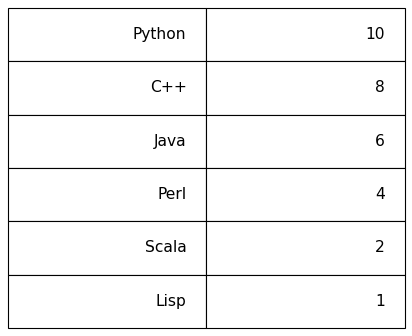

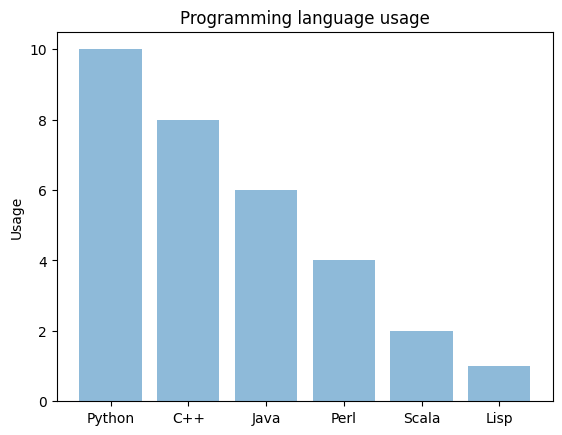

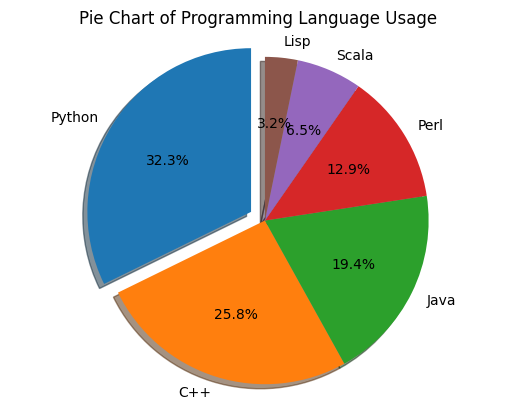

Generalised Viewer '1: standard text viewer' has: 
Name = Model 1; 
Labels = ['Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp']; 
Data = [10, 8, 6, 4, 2, 1]


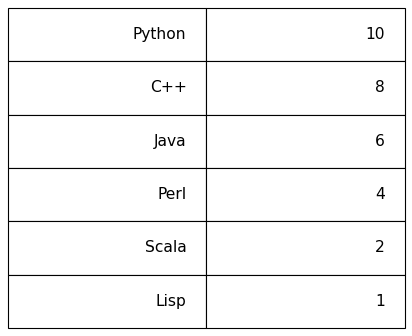

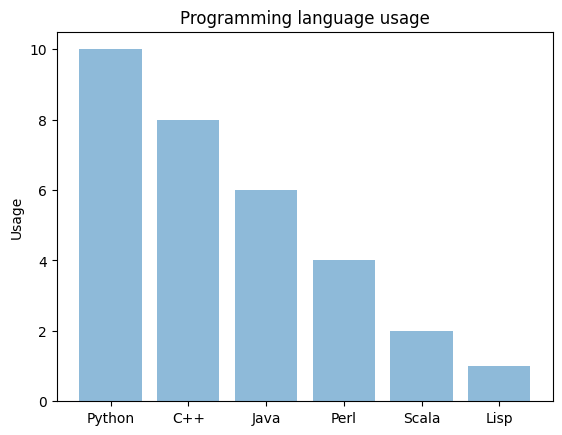

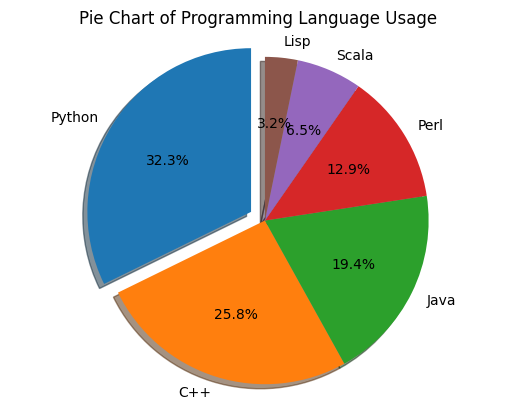

Generalised Viewer '1: standard text viewer' has: 
Name = Model 1; 
Labels = ['C#', 'PHP', 'JavaScript', 'ASP', 'Python', 'Smalltalk']; 
Data = [10, 8, 6, 4, 2, 1]


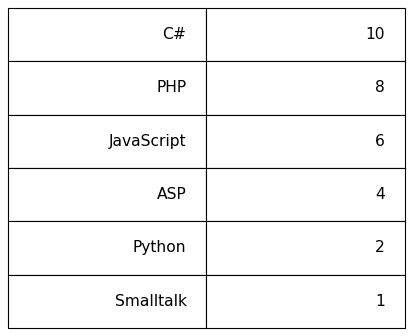

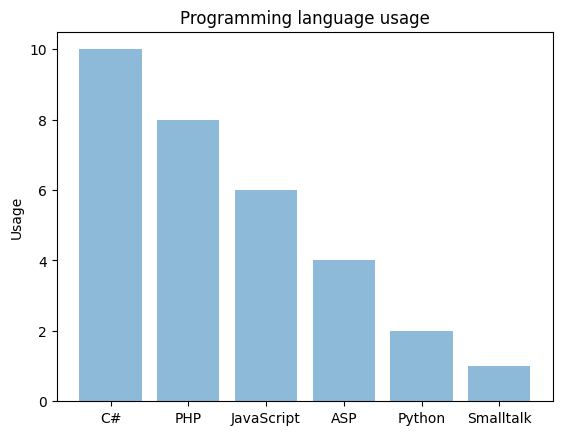

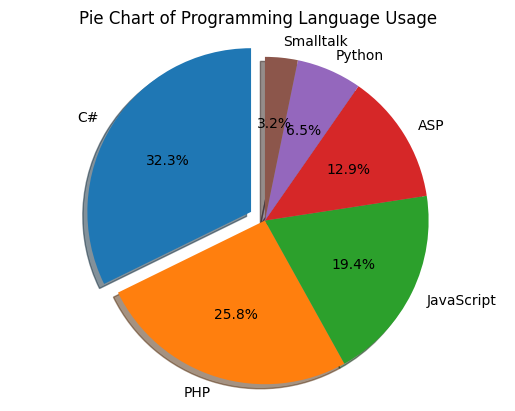

Generalised Viewer '1: standard text viewer' has: 
Name = Model 1; 
Labels = ['C#', 'PHP', 'JavaScript', 'ASP', 'Python', 'Smalltalk']; 
Data = [1, 18, 8, 60, 3, 1]


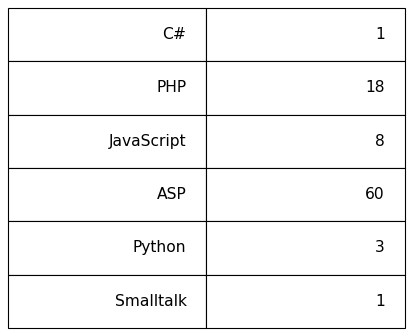

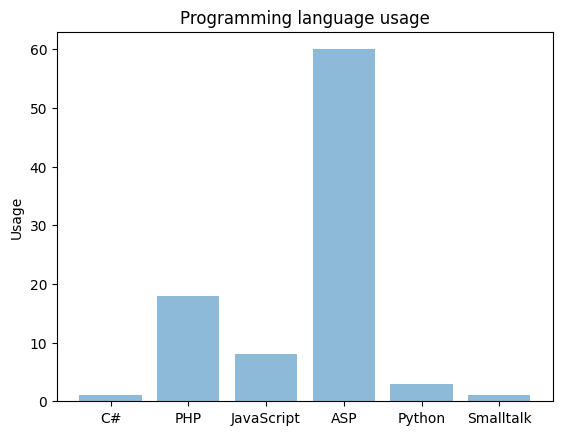

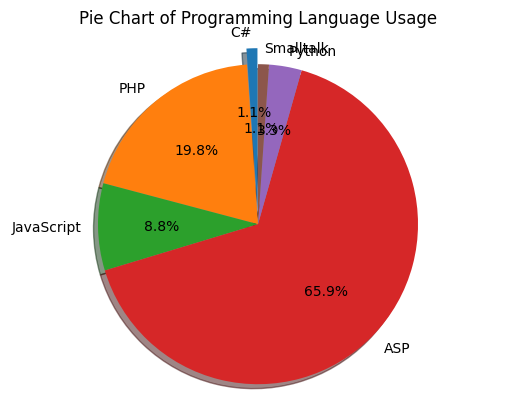

In [6]:
import matplotlib.pyplot as plt
import numpy as np


# Nicely abstracted structure by which any model can notify any observer (view) of changes in the model
class Subject(object): #Represents what is being 'observed'

    def __init__(self):
        self._observers = [] # This where references to all the observers are being kept
                             # Note that this is a one-to-many relationship: there will be one subject to be observed by multiple _observers

    def attach(self, observer):
        if observer not in self._observers: #If the observer is not already in the observers list
            self._observers.append(observer) # append the observer to the list

    def detach(self, observer): #Simply remove the observer
        try:
            self._observers.remove(observer)
        except ValueError:
            pass

    def notify(self, modifier=None):
        for observer in self._observers: # For all the observers in the list
            if modifier != observer: # Don't notify the observer who is actually doing the updating 
                observer.update(self) # Alert the observers!
                
# Represents the 'data' for which changes will produce notifications to any registered view/observer objects 
class Model(Subject): # Extends the Subject class

    def __init__(self, name):
        Subject.__init__(self)
        self._name = name # Set the name of the model
        self._labels = ['Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp']
        self._data = [10,8,6,4,2,1]

    @property #Getter that gets the labels
    def labels(self):
        return self._labels

    @labels.setter #Setter that sets the labels
    def labels(self, labels):
        self._labels = labels
        self.notify() # Notify the observers whenever somebody changes the labels
        
    @property #Getter that gets the data
    def data(self):
        return self._data

    @data.setter #Setter that sets the labels
    def data(self, data):
        self._data = data
        self.notify() # Notify the observers whenever somebody changes the data
        

# This is the 'standard' view/observer which also acts as an 'abstract' class whereby deriving Bar/Chart/Table views override the update() method
# This 'abstracted' layer is always shown in examples but is important to demonstrate potential polymorphic behaviour of update()
class View():
    
    def __init__(self, name=""):
         self._name = name #Set the name of the Viewer

    def update(self, subject): #Alert method that is invoked when the notify() method in a concrete subject is invoked
        print("Generalised Viewer '{}' has: \nName = {}; \nLabels = {}; \nData = {}".format(self._name, subject._name, subject._labels, subject._data))

# Table 'chart' viewer/ConcreteObserver - overrides the update() method
class TableView(View):
    
    def update(self, subject): #Alert method that is invoked when the notify() method in a concrete subject is invoked
        fig = plt.figure(dpi=80)
        ax = fig.add_subplot(1,1,1)
        table_data = list(map(list,zip(subject._labels, subject._data)))
        table = ax.table(cellText=table_data, loc='center')
        table.set_fontsize(14)
        table.scale(1,4)
        ax.axis('off')
        plt.show()

# Bar chart viewer/ConcreteObserver - overrides the update() method
class BarView(View):
        
    def update(self, subject): #Alert method that is invoked when the notify() method in a concrete subject is invoked
        objects = subject._labels
        y_pos = np.arange(len(objects))
        performance = subject._data
        plt.bar(y_pos, performance, align='center', alpha=0.5)
        plt.xticks(y_pos, objects)
        plt.ylabel('Usage')
        plt.title('Programming language usage')
        plt.show()

# Pie chart viewer/ConcreteObserver - overrides the update() method
class PieView(View):

    def update(self, subject):  # Alert method that is invoked when the notify() method in a concrete subject is invoked
        # Pie chart, where the slices will be ordered and plotted counter-clockwise:
        labels = subject.labels
        sizes = subject.data
        explode = [0.1 if i == 0 else 0 for i in range(len(labels))]  # Explode the first slice for emphasis
        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.title('Pie Chart of Programming Language Usage')
        plt.show()


#Let's create our subjects
m1 = Model("Model 1")
m2 = Model("Model 2") # This is never used!

#Let's create our observers
v1 = View("1: standard text viewer")
v2 = TableView("2: table viewer")
v3 = BarView("3: bar chart viewer")
v4 = PieView("4: pie chart viewer")
####

#Let's attach our observers to the first model
m1.attach(v1)
m1.attach(v2)
m1.attach(v3)
m1.attach(v4)
####

# Let's just call the notify() method to see all the charts in their unchanged state
m1.notify()
m1.notify()

# Now Let's change the properties of our first model
# Change 1 triggers all 4 views and updates their labels
m1.labels = ['C#','PHP','JavaScript','ASP','Python','Smalltalk']
# Change 2 triggers all 4 views and updates their data
m1.data = [1,18,8,60,3,1]

###### References & Learning Resources#

- Gamma, E., Helm, R., Johnson, R., & Vlissides, J. (1995). Gamma, E., Helm, R., Johnson, R., & Vlissides, J. Mar. 1995. Design Patterns–Elements of Reusable Object-Oriented Software. Addison-Wesley.
- Jungwoo Ryoo (2015) Python: Design Patterns. Available at: https://www.linkedin.com/learning/python-design-patterns and https://www.lynda.com/Python-tutorials/Design-Patterns-Python/369187-2.html
- Toni Sellarès (undated) The Model View Controller: a Composed Pattern. Avaialable at: http://ima.udg.edu/~sellares/EINF-ES1/MVC-Toni.pdf
- Shalloway, A., & Trott, J. R. (2002). Design patterns explained: A new perspective on object-oriented design. Addison-Wesley